### Bootstrap confidence intervals ###

We are going to start with a case that would never happen in practice, but is good for teaching. Using the tables in [Summary File 1 or SF1](https://www.socialexplorer.com/data/C2000/metadata/?ds=SF1) that we can [download from the Census Bureau](https://www.census.gov/data/datasets/2010/dec/summary-file-1.html), we can use the so-called "database reconstruction theorem" to reconstruct (to remarkable accuracy) the person-level responses to 2010 Census questions about sex, age, ethnicity, and race. 

Below we will load in the person-level tables for all of Manhattan as reconstructed in this way. This give us a table with 1,585,873 rows, one for each person living in Manhattan. As these data were a census, they were extremely expensive to obtain, and we only undergo this process every 10 years. This gives us an opportunity to talk about sampling and confidence intervals and the bootstrap. 

The census data will serve as the population we are trying to learn something about. In this case, we happen to have all the answers from everyone in the population. It will cost us nothing to compute the "true" population parameters we might be interested in. We can also use the `sample_n()` command to conduct as many snap surveys of the population as we want... and the data are real, so there's no extra layer of distracting simulation here. 

First, let's read in the census data. Again, this can be considered actual person-level data from everyone living in Manhattan in 2010 (the reconstruction is exactly right for 50% of the population and 90% contains just one mistake, almost always age and almost the age is off by a year or two -- we will ignore these errors and take these data to be the answers from the population living in Manhattan).

To load the data, you need to download it from [this Dropbox link](https://www.dropbox.com/s/mxsukoowq2ds8cf/manhattan_census.csv?dl=0). Place the file `manhattan_census.csv` into the same folder as this notebook is in. Then you should be able to read it with the code below.

In [1]:
census <- read.csv("manhattan_census.csv")
head(census)

sex,age,ethn,race,tract
male,63,not hisp,a,1000100
female,58,not hisp,a,1000100
female,33,not hisp,a,1000201
female,36,not hisp,w,1000201
female,51,hisp,o,1000201
male,35,hisp,o,1000201


And sure enough there are 1,585,873 rows, each row a person's response. I've also included the tract people live in. Tracts are made up of blocks, the census' finest level of geography, but I decided not to include block for privacy reasons. 

In [2]:
dim(census) # dimension (shape)

[1] 1585873       5

We are going to use the entire city as our population, but we could use these data to ask about differences between different neighborhoods. The tracts I provided are enough to create New York City's Neighborhood Tabulation Areas. They are [given here](https://data.cityofnewyork.us/City-Government/2010-Census-Tract-to-Neighborhood-Tabulation-Area-/8ius-dhrr). You can see a map of the names of the neighborhoods referenced in this table [here](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/nyc-population/census2010/ntas.pdf)

Let's have a look just to keep things real. 

In [6]:
nbhds <- read.csv("https://data.cityofnewyork.us/api/views/8ius-dhrr/rows.csv?accessType=DOWNLOAD")
head(nbhds)

Borough,X2010.Census.Bureau.FIPS.County.Code,X2010.NYC.Borough.Code,X2010.Census.Tract,PUMA,Neighborhood.Tabulation.Area..NTA.Code,Neighborhood.Tabulation.Area..NTA..Name
Bronx,5,2,31000,3704,BX31,Allerton-Pelham Gardens
Bronx,5,2,31200,3704,BX31,Allerton-Pelham Gardens
Bronx,5,2,31400,3704,BX31,Allerton-Pelham Gardens
Bronx,5,2,31600,3704,BX31,Allerton-Pelham Gardens
Bronx,5,2,31800,3704,BX31,Allerton-Pelham Gardens
Bronx,5,2,32600,3704,BX31,Allerton-Pelham Gardens


Loading up our two favorite libraries, we can slice and dice a little. Let's first pull the tracts that are associated with Morningside Heights.

In [7]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



We `filter()` on the variable `Neighborhood.Tabulation.Area..NTA..Name`, keeping only the rows that refer to Morningside Heights. The name of the variable has periods in it and that happens from time to time when you import data from a spread sheet and someone has incuded spaces in the column names. R hates spaces in variable names and so converts them to periods.

In [8]:
msh <- filter(nbhds,Neighborhood.Tabulation.Area..NTA..Name=="Morningside Heights")

In [9]:
msh

Borough,X2010.Census.Bureau.FIPS.County.Code,X2010.NYC.Borough.Code,X2010.Census.Tract,PUMA,Neighborhood.Tabulation.Area..NTA.Code,Neighborhood.Tabulation.Area..NTA..Name
Manhattan,61,1,19300,3802,MN09,Morningside Heights
Manhattan,61,1,19500,3802,MN09,Morningside Heights
Manhattan,61,1,19701,3802,MN09,Morningside Heights
Manhattan,61,1,19900,3802,MN09,Morningside Heights
Manhattan,61,1,20101,3802,MN09,Morningside Heights
Manhattan,61,1,20300,3802,MN09,Morningside Heights
Manhattan,61,1,20500,3802,MN09,Morningside Heights
Manhattan,61,1,20701,3802,MN09,Morningside Heights
Manhattan,61,1,20901,3802,MN09,Morningside Heights
Manhattan,61,1,21100,3802,MN09,Morningside Heights


Here are the tracts for the Upper West Side.

In [10]:
uws <- filter(nbhds,Neighborhood.Tabulation.Area..NTA..Name=="Upper West Side")

In [11]:
uws

Borough,X2010.Census.Bureau.FIPS.County.Code,X2010.NYC.Borough.Code,X2010.Census.Tract,PUMA,Neighborhood.Tabulation.Area..NTA.Code,Neighborhood.Tabulation.Area..NTA..Name
Manhattan,61,1,18100,3806,MN12,Upper West Side
Manhattan,61,1,16100,3806,MN12,Upper West Side
Manhattan,61,1,16300,3806,MN12,Upper West Side
Manhattan,61,1,16500,3806,MN12,Upper West Side
Manhattan,61,1,16700,3806,MN12,Upper West Side
Manhattan,61,1,16900,3806,MN12,Upper West Side
Manhattan,61,1,17100,3806,MN12,Upper West Side
Manhattan,61,1,17300,3806,MN12,Upper West Side
Manhattan,61,1,17500,3806,MN12,Upper West Side
Manhattan,61,1,17700,3806,MN12,Upper West Side


Alright, if you like, you can create a subset of our data and study just a neighborhood instead of the entire borough, but let's be bold. Recall the number of people who we have answering the census.

In [12]:
dim(census)

[1] 1585873       5

Let's compute a couple of *population quantities* that we'd like to know about the people living here. Add more as you like. We are using the verb `summarize()` to create summaries from the census.

In [13]:
summarize(census,pop_avg_age=mean(age),pop_prop_his=mean(ethn=="hisp"),pop_prop_female=mean(sex=="female"))

pop_avg_age,pop_prop_his,pop_prop_female
38.84488,0.2544825,0.5305797


These are *population* figures. In a typical setting we would never have these. It is only with a census that we get data on the complete population. Usually, when Politico asks how popular Trump is, or the BRFSS calls to find out about your eating habits, the organization conducts a survey. 

**Classical confidence intervals**

In our world that could be done simply by taking `sample_n()` samples from the `census` data frame. Here we conduct a single survey of 750 people asking the same questions above -- age, ethnicity and sex.

In [14]:
n <- 750

survey <- sample_n(census,n)
head(survey)

,sex,age,ethn,race,tract
185105,male,37,not hisp,a,1003800
1062073,male,63,not hisp,w,1018700
1124325,male,58,not hisp,w,1019500
787115,male,18,hisp,b,1015100
695853,male,62,not hisp,w,1013800
211254,female,52,not hisp,a,1004100


In [15]:
dim(survey)

[1] 750   5

So that gives us 750 people and their answers to questions about their age, race, ethnicity, sex and something about where they live. Let's now look at *estimates* of the population quantities derived from our survey, our sample. Same code as above, except now we use `summarize()` to produce summary statistics from the survey. Execute the code a few times and notice that each sample involves different people (probably entirely different people) and so our estimates change each time.

In [16]:
n <- 750

survey <- sample_n(census,n)
summarize(survey,avg_age=mean(age),prop_hisp=mean(ethn=="hisp"),prop_female=mean(sex=="female"))

avg_age,prop_hisp,prop_female
38.68667,0.264,0.5466667


We see that each time the survey results change a little. Now, because we are in a highly specialized case where we know the answers, we see them Recall that frequentists think about probability arising from repeated events. So to understand the behavior of estimates, they often imagine our single survey as one of a series and talk about the property of that series. 

That will let us infer something about the population information we want to know when we are not in this privileged place of knowing the "truth," but instead all we know is a single survey result. 

So, let's see what happens when we repeat surveys a number of times. Not just once or twice as above, but we will use a *loop* to repeat our survey, in this case 2000 times. Again, no polling agency would ever do this, but it's the kind of thought experiment frequentists use to come up with strategies to learn from data, to learn from a single survey.

In [17]:
# one survey, record the average and sd of age in a table (data frame) called many_surveys

survey <- sample_n(census,n)
many_surveys <- summarize(survey,avg_age=mean(age),sd_age=sd(age))

# repeate it 1,999 times, each time adding the mean and sd of age to the many_surveys table

for(i in 2:2000){
    survey <- sample_n(census,n)
    many_surveys <- bind_rows(many_surveys,
                                summarize(survey,avg_age=mean(age),sd_age=sd(age)))
}

So now we have the results from 2,000 surveys. Each time we get a new sample from the population, we collect their data and we record their ages. We then report the mean and standard deviation of the ages in each survey. So that means 2,000 averages and sds. 

Here they are.

In [18]:
head(many_surveys)

avg_age,sd_age
38.71067,21.26739
38.80800,20.44447
40.03200,21.87259
39.43867,21.52754
39.39467,21.08667
39.96933,21.51524


Now, let's have a look at how these values change from survey to survey. It seems from the table above that they bounce around a little, but what do they look like? What happens when you repeat the survey a lot of times? What insights do we get?

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

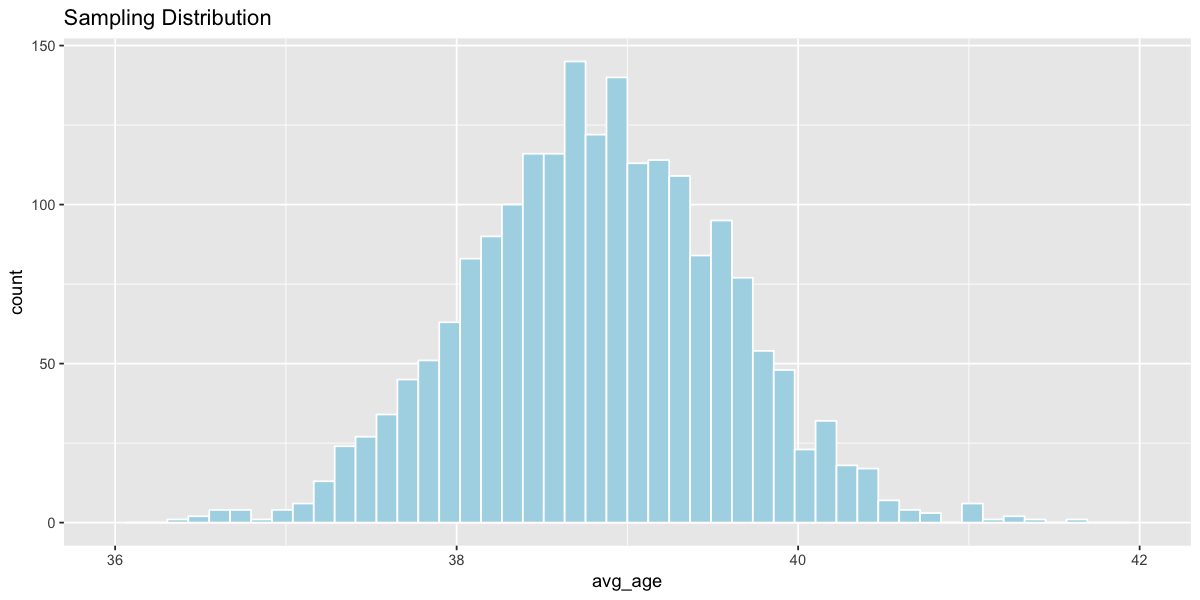

In [19]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot() + 
    geom_histogram(aes(x=avg_age),many_surveys,bins=50,color="white",fill="lightblue")+
    xlim(36,42)+
    ggtitle("Sampling Distribution")

The creature above is called the *sampling distribution*. It summarizes what we see when we repeat our survey many times. What does it look like to you? 

Thanks to a lot of clever math, we are looking at something called the Central Limit Theorm at work. It says that averages (in this case, the average height) behaves like a normal distribution if the number of people you talk to is large enough. 

That's great because it means we can use properties of the normal. Below we pull the true population values for the average age in Manhattan and its standard deviation. We add these to our plot. 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

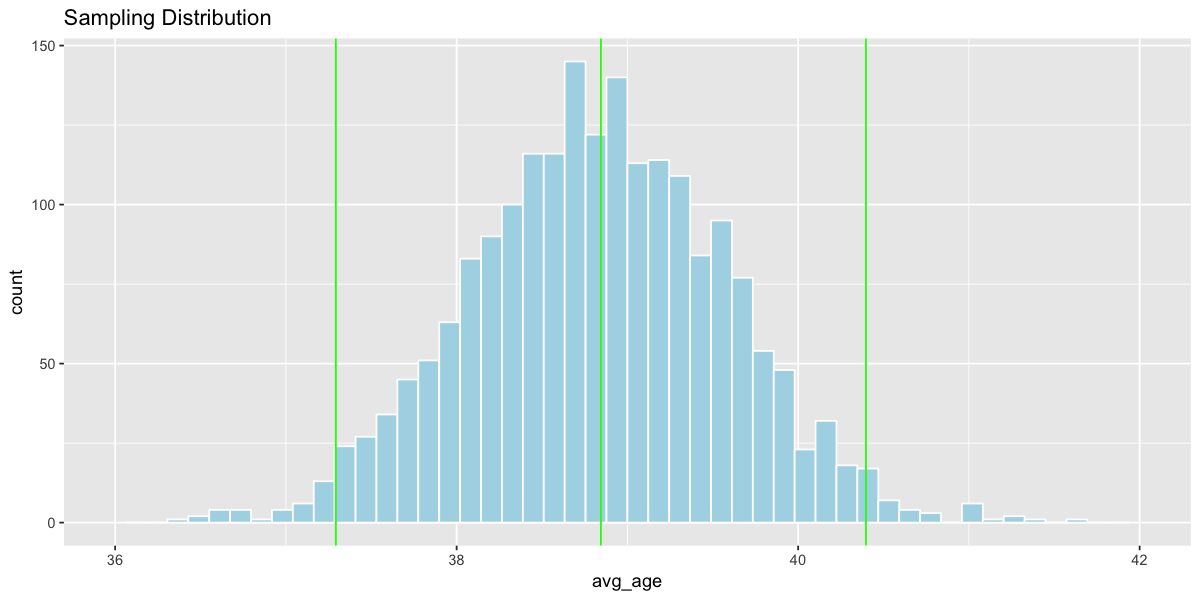

In [20]:
mu <- mean(pull(census,age))
sigma <- sd(pull(census,age))

ggplot() + 
    geom_histogram(aes(x=avg_age),many_surveys,bins=50,color="white",fill="lightblue") +
    geom_vline(xintercept=mu,color="green")+
    geom_vline(xintercept=mu+2*sigma/sqrt(n),color="green")+
    geom_vline(xintercept=mu-2*sigma/sqrt(n),color="green")+
    xlim(36,42)+
    ggtitle("Sampling Distribution")

It turns out that while the surveys bounce around a lot, their average is essentially right on the true value. So each survey is different from the population value, but it varies in a predictable way. 

In [21]:
mean(pull(many_surveys,avg_age))
mu

[1] 38.82859

[1] 38.84488

Turns out that the sd's of our surveys are also more or less predictable. Here the average of the sd's from the surveys -- they match the population sd divided by the square root of our survey size. This is an important last ingredient to the Frequentist cabal.

In [22]:
sd(pull(many_surveys,avg_age))
sigma/sqrt(750)

[1] 0.7512367

[1] 0.7761185

Now, because we have a normal distribution, we know some things about the way data are distributed around its mean. In this case, we know how the survey results tend to be distributed around the population parameter. 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

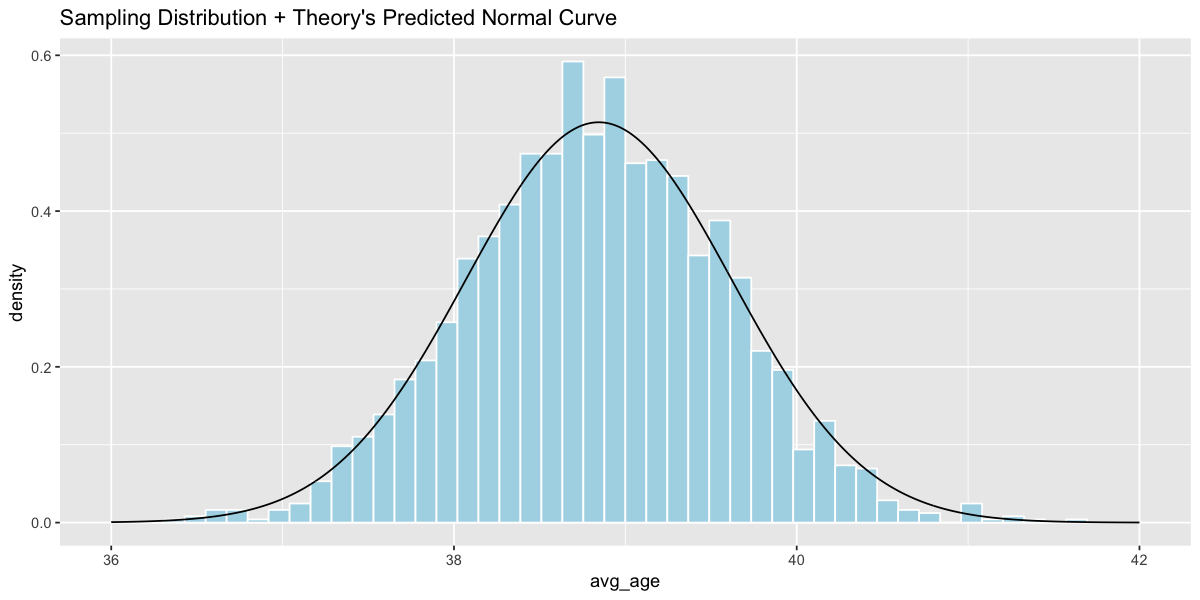

In [23]:
normaldata <- data.frame(pts=seq(36,42,len=500),norm=dnorm(seq(36,42,len=500),m=mu,sd=sigma/sqrt(750)))

ggplot() + 
    geom_histogram(aes(x=avg_age,y=..density..),many_surveys,bins=50,color="white",fill="lightblue") +
    geom_line(aes(x=pts,y=norm),normaldata)+
    xlim(36,42)+
    ggtitle("Sampling Distribution + Theory's Predicted Normal Curve")

Here's the trick. Because repeated surveys tend to follow a normal curve centered around the population parameter, we know that 68% of them will be within one standard deviation of the mean and 95% of them will be within two standard deviations of the mean. 

<img src=https://errorstatistics.files.wordpress.com/2014/10/normal-curve-2-3-and-5-sigma.jpg width=500>

And just to check, we get 68% and 95% in our case.

In [24]:
inside <- nrow(filter(many_surveys, (avg_age < mu+sigma/sqrt(n)) & (avg_age > mu-sigma/sqrt(n))))
inside/2000

[1] 0.703

In [25]:
inside <- nrow(filter(many_surveys,(avg_age < mu+2*sigma/sqrt(n)) & (avg_age > mu-2*sigma/sqrt(n))))
inside/2000

[1] 0.965

OK, so 95% of the survey estimates, mean age, live within two standard deviations of population mean, the number we're after. We can flip that around and say that 95% of the time, the population mean is within two standard deviations of a survey estimate. 

So this would give us our 95% confidence interval if only we knew the population standard deviation. Well, using the "plug-in principle", we can just estimate the population sd with our survey sd. That gives us a "classic" frequentist confidence interval for a mean.

In [26]:
many_surveys <- mutate(many_surveys,trial=1:2000,cover=mu<avg_age+2*sd_age/sqrt(n) & mu>avg_age-2*sd_age/sqrt(n))
head(many_surveys)

avg_age,sd_age,trial,cover
38.71067,21.26739,1,TRUE
38.80800,20.44447,2,TRUE
40.03200,21.87259,3,TRUE
39.43867,21.52754,4,TRUE
39.39467,21.08667,5,TRUE
39.96933,21.51524,6,TRUE


The `many_surveys` data frame now has one row per survey, each reporting the average and sd of people's heights and in the survey. We then form the confidence interval

$$\rm{avg\_age} \pm 2\, \rm{sd\_age}/sqrt(750)$$

In [27]:
survey <- sample_n(census,n)
summarize(survey,lower=mean(age)-2*sd(age)/sqrt(n),upper=mean(age)+2*sd(age)/sqrt(n))

lower,upper
38.26402,41.30664


In [28]:
mean(pull(census,age))

[1] 38.84488

This is all computable from our survey. We can now ask how many times is the true population parameter contained in these intervals? Here we take just the first 100.

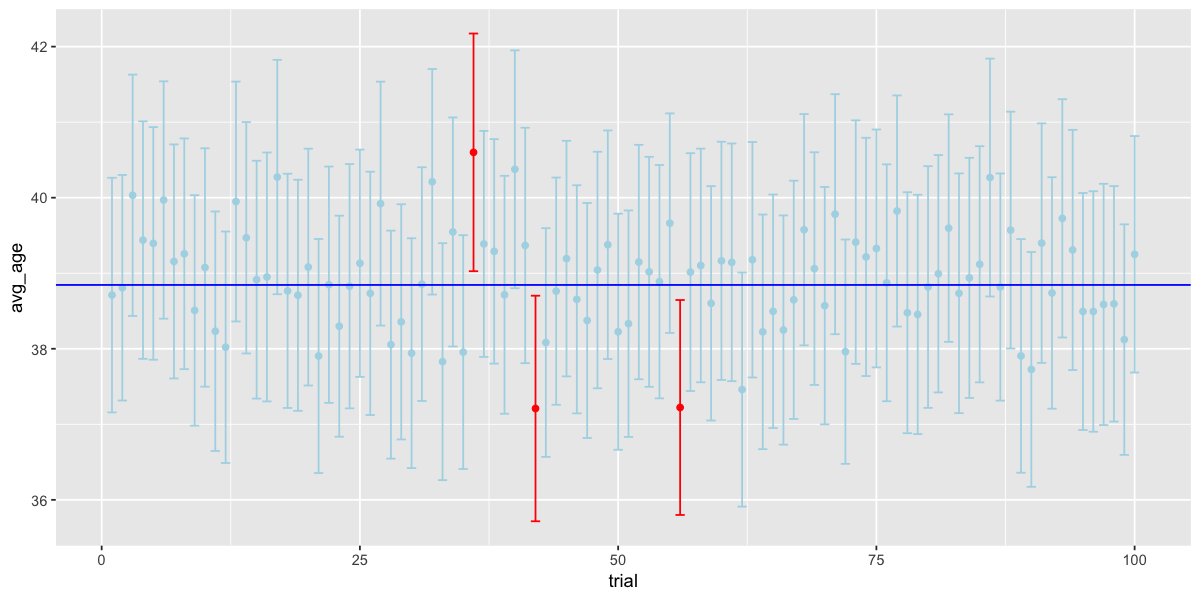

In [29]:
ggplot(head(many_surveys,100),aes(x=trial,y=avg_age,color=cover))+
    scale_color_manual("cover", breaks=c(1,2),values=c("red", "lightblue"))+
    geom_errorbar(aes(ymin=avg_age-2*sd_age/sqrt(n), ymax=avg_age+2*sd_age/sqrt(n),color=cover))+
    geom_point(aes(x=trial,y=avg_age,color=cover))+
    geom_hline(yintercept=mu,color="blue")+
    theme(legend.position="none")

In [30]:
summarize(many_surveys,coverage=mean(cover))

coverage
0.965


**Now, the bootstrap**

The previous setup relied on a fair bit of math to make it go. We had to know the sampling distribution looked essentially normal to be able to flip things around. With the bootstrap, we don't have to know any of that. We are a lot more free because we have a computational mechanism to rely on with proven properties.

For the bootstrap, let's again try to reason just from the sample. Here we take a survey of 750 people.

In [31]:
n <- 750

survey <- sample_n(census,n)
summarize(survey,avg_age=mean(age),sd_age=sd(age))

avg_age,sd_age
38.79333,20.87604


Now, the plug-in principle is behind the bootstrap too, but instead of replacing an estimate for the standard deviation, we now "plug in" the sample for the population. This seems like magic and is where the procedure gets its name. We pull ourselves up by our bootstraps. 

As we mentioned last time, we can approximate the sampling distribution by simply sampling *with replacement* from our survey data. We refer to each sample created this way as a *bootstrap sample*. Here we go.

In [32]:
boot <- sample_n(survey,n,replace=TRUE)
summarize(boot,avg_age=mean(age))

avg_age
37.22133


To approximate the sampling distribution for our estimate of the mean height in the population, we redo this many times. Here I take 5,000. It is usually a big-ish number. But since we re just resampling from the survey, it's fast.

In [33]:
# create our first bootstrap sample and store the summary statistics in boots

boot <- sample_n(survey,n,replace=TRUE)
boots <- summarize(boot,avg_age=mean(age))

# repeat this 4,999 times, building up boots as we go

for(i in 2:5000){
    boot <- sample_n(survey,n,replace=TRUE)
    boots <- bind_rows(boots,summarize(boot,avg_age=mean(age)))
}

This then gives us an approximation to the sampling distribution. 

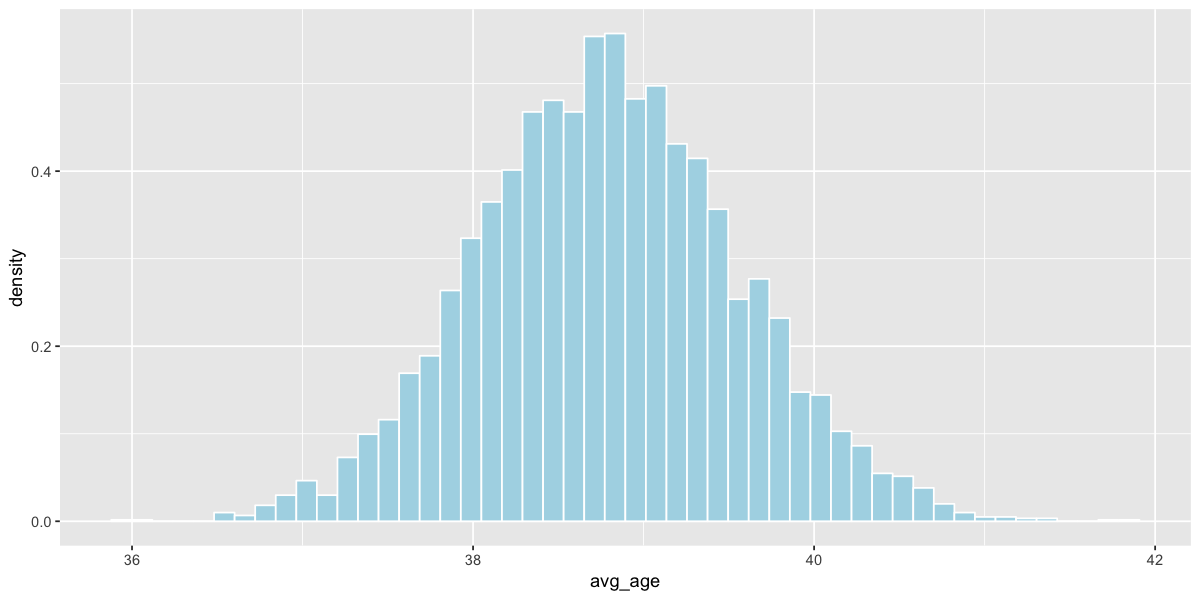

In [34]:
ggplot() + 
    geom_histogram(aes(x=avg_age,y=..density..),boots,bins=50,color="white",fill="lightblue")

We form our confidence interval directly from these data, again, all derived from the original survey data.

In [35]:
boot_avg <- mean(pull(boots,avg_age))
boot_sd <- sd(pull(boots,avg_age))

In [36]:
boot_avg-2*boot_sd
boot_avg+2*boot_sd
mu

[1] 37.25938

[1] 40.31463

[1] 38.84488

Notice that the truth is inside the confidence interval. We could have also used the 0.95 and 0.025 quantiles if we didn't think the approximation looked normal.

In [37]:
quantile(pull(boots,avg_age),c(0.025,0.975))

2.5%    97.5% 
37.31323 40.31603

To show this works, we will repeat the process 25 times and see what the coverage looks like.

In [38]:
many_boots <- data.frame(boot_avg=boot_avg,boot_sd=boot_sd)

for(i in 2:25){
        
    survey <- sample_n(census,n)
    
    boot <- sample_n(survey,n,replace=TRUE)
    boots <- summarize(boot,avg_age=mean(age))

    for(i in 2:5000){
        boot <- sample_n(survey,1000,replace=TRUE)
        boots <- bind_rows(boots,summarize(boot,avg_age=mean(age)))
    }
    
    many_boots <- bind_rows(many_boots,summarize(boots,boot_avg=mean(avg_age),boot_sd=sd(avg_age)))
}

We will again ask how many times is the mean contained in the interval and create the plot from above. 

In [39]:
many_boots <- mutate(many_boots,trial=1:25,cover=mu<boot_avg+2*boot_sd & mu>boot_avg-2*boot_sd)

In [40]:
many_boots

boot_avg,boot_sd,trial,cover
38.78700,0.7638122,1,TRUE
38.40615,0.6686966,2,TRUE
39.17980,0.6578884,3,TRUE
39.53216,0.6731659,4,TRUE
38.76798,0.6702066,5,TRUE
39.56516,0.6659932,6,TRUE
39.91069,0.6694957,7,TRUE
38.62044,0.6789688,8,TRUE
39.22332,0.6537986,9,TRUE
38.71194,0.6602012,10,TRUE


And our plot...

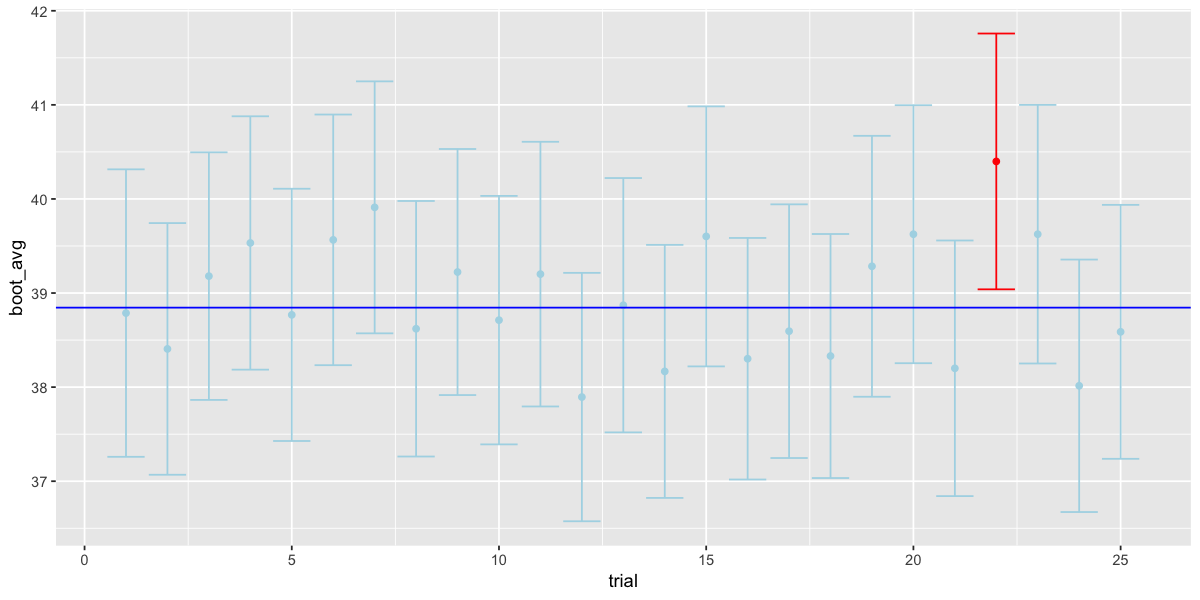

In [41]:
ggplot(head(many_boots,100),aes(x=trial,y=boot_avg,color=cover))+
    scale_color_manual("cover", breaks=c(1,2),values=c("red", "lightblue"))+
    geom_errorbar(aes(ymin=boot_avg-2*boot_sd, ymax=boot_avg+2*boot_sd,color=cover))+
    geom_point(aes(x=trial,y=boot_avg,color=cover))+
    geom_hline(yintercept=mu,color="blue")+
    theme(legend.position="none")

Now, suppose we want another statistic, say the median height. 

In [42]:
# create our first bootstrap sample and store the summary statistics in boots
survey <- sample_n(census,n)

boot <- sample_n(survey,n,replace=TRUE)
boots <- summarize(boot,med_age=median(age))

# repeat this 4,999 times, building up boots as we go

for(i in 2:5000){
    boot <- sample_n(survey,n,replace=TRUE)
    boots <- bind_rows(boots,summarize(boot,med_age=median(age)))
}

In [43]:
summarize(boots,lower=quantile(med_age,0.025),upper=quantile(med_age,0.975))

lower,upper
34,39.5


In [44]:
median(pull(census,age))

[1] 36